In [0]:
def weekanalysis(a,b):
    flatList=[]
    count={}
    mask = df[(df['date'] >=a) & (df['date'] <=b)]
    mask['hashtags']=mask['hashtags'].str.split(" ")
    b=[x for x in mask['hashtags'] if str(x) !='nan']
    for elem in b:
        for item in elem:
            flatList.append(item)
    for a in flatList:
        if a in count:
            count[a]+=1
        else:
            count[a]=1
    max_hashtag=max(count.items(), key=operator.itemgetter(1))[0]
    return max_hashtag
    

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
frame=pd.DataFrame(Weekly_count).T
frame.columns=['Week','Date','#tag']
frame

,Week,Date,#tag
0,0,2020-02-11-2020-02-17,#COVID_19
1,1,2020-02-18-2020-02-24,#Covid_19
2,2,2020-02-25-2020-03-02,#Covid_19
3,3,2020-03-03-2020-03-09,#Covid_19
4,4,2020-03-10-2020-03-16,#Covid_19
5,5,2020-03-17-2020-03-23,#Covid_19
6,6,2020-03-24-2020-03-30,#Covid_19
7,7,2020-03-31-2020-04-06,#Covid_19
8,8,2020-04-07-2020-04-13,#Covid_19
9,9,2020-04-14-2020-04-20,#Covid_19


# Top 20 tweets Weekly Wise

In [0]:
def weekanalysistop3(a,b):
    flatList=[]
    count={}
    top3=[]
    mask = df[(df['date'] >=a) & (df['date'] <=b)]
    mask['hashtags']=mask['hashtags'].str.split(" ")
    b=[x for x in mask['hashtags'] if str(x) !='nan']
    for elem in b:
        for item in elem:
            flatList.append(item)
    for a in flatList:
        if a in count:
            count[a]+=1
        else:
            count[a]=1
    k=Counter(count)
    high=k.most_common(20)
    for i in high: 
        top3.append(i[0])
    return top3
    

In [0]:
import pandas as pd
from collections import Counter
df=pd.read_csv("Sentiment&Cleaned.csv")
df['date']=df['date'].str.split(" ").str[0]
df['hashtags']=df['hashtags'].str.lower()
df=df.sort_values(by='date')
date=[]
topTw=[]
Weekly_count3={}
count=0
unique_dates=df['date'].unique()
for i in range(0, len(unique_dates), 7):  
    date.append(unique_dates[i:i+7])
for j in range(len(date)):
    dates=date[j]
    Weekly_count3[count]=[j,str(dates[0])+'-'+str(dates[-1])]
    topTw.append(weekanalysistop3(dates[0],dates[-1]))
    count=count+1

In [0]:
rank=[]
frame1=pd.DataFrame(Weekly_count3).T
frame1.columns=['Week','Date']
for b in range(len(topTw[0])):
    rank.append(f"Rank: {b}")
df3=pd.DataFrame(topTw,columns=rank)
final=pd.concat([frame1,df3],axis=1)
#f=final.iloc[2:]


In [0]:
final

,Week,Date,Rank: 0,Rank: 1,Rank: 2,Rank: 3,Rank: 4,Rank: 5,Rank: 6,Rank: 7,...,Rank: 10,Rank: 11,Rank: 12,Rank: 13,Rank: 14,Rank: 15,Rank: 16,Rank: 17,Rank: 18,Rank: 19
0,0,2020-02-11-2020-02-17,#covid_19,#coronavirus,#covid19,#covid,#china,#swachhsurvekshan2020surat,#coronavirusoutbreak,#sarscov2,...,#corona,#publichealth,#globalhealth,#covid2019,#singapore,#coronavirusjapan,#wuhan,#who,#wuhancoronavirus,#coronarvirus
1,1,2020-02-18-2020-02-24,#covid_19,#coronavirus,#covid19,#swachhsurvekshan2020surat,#covid,#covid2019,#coronavirusoutbreak,#china,...,#southkorea,#coronavirius,#covid19italia,#korea,#vietnam,#coronavirusitalla,#italy,#shanghai,#diamondprincesscruise,#infographic
2,2,2020-02-25-2020-03-02,#covid_19,#coronavirus,#covid,#covid19,#covid2019,#coronavirusoutbreak,#swachhsurvekshan2020surat,#coronavirusupdates,...,#coronarovirus,#handhygiene,#coronavid19,#pandemic,#china,#corona,#coronavirusupdate,#coronavirius,#covid19italia,#singapore
3,3,2020-03-03-2020-03-09,#covid_19,#coronavirus,#covid,#covid19,#coronavirusoutbreak,#coronaoutbreak,#coronaalert,#coronvirus,...,#corona,#coronavirusupdate,#coronavirusireland,#china,#coronavirusindia,#japan,#coronavirusaustralia,#swachhsurvekshan2020surat,#toiletpapergate,#coronavirusseattle
4,4,2020-03-10-2020-03-16,#covid_19,#coronavirus,#covid,#coronaviruspandemic,#covid19,#coronaoutbreak,#coronavirusupdate,#corona,...,#lockdown,#socialdistancing,#coronavirusoutbreak,#pandemic,#covid2019,#stayhome,#flattenthecurve,#coronavirusupdates,#italy,#panicbuying
5,5,2020-03-17-2020-03-23,#covid_19,#coronavirus,#covid,#stayathome,#covid19,#stayhome,#socialdistancing,#corona,...,#coronavirusupdate,#coronavirusoutbreak,#quarantine,#lockdown,#staysafe,#covid2019,#washyourhands,#indiafightscorona,#pandemic,#staysafestayhome
6,6,2020-03-24-2020-03-30,#covid_19,#stayhome,#coronavirus,#covid19,#covid,#stayathome,#lockdown,#corona,...,#stayathomeandstaysafe,#staysafe,#coronaupdate,#coronalockdown,#indiafightscorona,#covid2019,#washyourhands,#stayhomesavelives,#coronavirusoutbreak,#flattenthecurve
7,7,2020-03-31-2020-04-06,#covid_19,#coronavirus,#covid19,#covid,#stayhome,#stayathome,#covid2019,#coronaviruspandemic,...,#covid19pandemic,#stayhomesavelives,#lockdowneffect,#staysafe,#indiafightscorona,#socialdistancing,#quarantine,#pandemic,#coronavirusoutbreak,#coronavirusupdate
8,8,2020-04-07-2020-04-13,#covid_19,#covid19,#coronavirus,#covid,#worldhealthday,#stayhome,#stayathome,#covid__19,...,#corona,#lockdown,#worldhealthday2020,#pandemic,#socialdistancing,#coronaviruspandemic,#indiafightscorona,#lockdowneffect,#coronavirusoutbreak,#stayhomestaysafe
9,9,2020-04-14-2020-04-20,#covid_19,#covid19,#coronavirus,#covid,#stayhome,#stayathome,#lockdown,#togetherathome,...,#corona,#coronaviruspandemic,#staysafe,#socialdistancing,#quarantine,#indiafightscorona,#trump,#quarantinelife,#cdnpoli,#coronavirusoutbreak


In [0]:
final.to_csv("weekanalysis.csv")

# #tags Frequency

In [0]:
import pandas as pd
listflat=[]
df=pd.read_csv("Sentiment&Cleaned.csv")
df['date']=df['date'].str.split(" ").str[0]
df=df.sort_values(by='date')
df1=df
df1['hashtags']=df1['hashtags'].str.lower()
df1['hashtags']=df1['hashtags'].str.split(" ")
b=[x for x in df1['hashtags'] if str(x) !='nan']
for elem in b:
        for item in elem:
            listflat.append(item)

In [0]:
alltags={}
for a in listflat:
        if a in alltags:
            alltags[a]+=1
        else:
            alltags[a]=1
sorted_x = sorted(alltags.items(), key=operator.itemgetter(1),reverse=True)
sorted_x

[('#covid_19', 109393),
 ('#covid19', 43311),
 ('#coronavirus', 39577),
 ('#covid', 32688),
 ('#stayhome', 17904),
 ('#stayathome', 9706),
 ('#covid__19', 6302),
 ('#lockdown', 5950),
 ('#covid2019', 4926),
 ('#corona', 4541),
 ('#coronaviruspandemic', 4465),
 ('#staysafe', 3935),
 ('#socialdistancing', 3789),
 ('#worldhealthday', 3677),
 ('#pandemic', 3544),
 ('#quarantine', 2964),
 ('#stayhomesavelives', 2848),
 ('#indiafightscorona', 2513),
 ('#coronavirusoutbreak', 2420),
 ('#coronavirusupdate', 2413),
 ('#cdnpoli', 1959),
 ('#covid19pandemic', 1933),
 ('#flattenthecurve', 1842),
 ('#stayhomestaysafe', 1767),
 ('#news', 1711),
 ('#lockdowneffect', 1670),
 ('#washyourhands', 1660),
 ('#trump', 1652),
 ('#quarantinelife', 1650),
 ('#health', 1595),
 ('#china', 1562),
 ('#mentalhealth', 1548),
 ('#breaking', 1442),
 ('#togetherathome', 1427),
 ('#healthcare', 1360),
 ('#lockdownsa', 1309),
 ('#business', 1292),
 ('#india', 1190),
 ('#coronavirususa', 1166),
 ('#canada', 1137),
 ('#cov

In [0]:
# final=pd.concat([frame1,df3],axis=1).T

In [0]:
#f=pd.DataFrame(columns=final['Week'])
#final=pd.DataFrame(columns=['Week0','Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9'])
# final.columns=['Week0','Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9']

In [0]:

# final=final.iloc[2:]

# Weekly Wise Sentiment Analysis

In [0]:
import pandas as pd
import operator
df=pd.read_csv("Final.csv")
df['date']=df['date'].str.split(" ").str[0]
df=df.sort_values(by='date')
date=[]
Weekly_count={}
count=0
a=[]
unique_dates=df['date'].unique()
for i in range(0, len(unique_dates), 7):  
    date.append(unique_dates[i:i+7])
for j in range(len(date)):
    dates=date[j]
    mask = df[(df['date'] >=dates[0]) & (df['date'] <=dates[-1])]
    a.append(mask["Sentiment"].value_counts().to_frame(dates[0]+"to"+dates[-1]))
    
#     #print(weekanalysis(dates[0],dates[-1]))
#     #Weekly_count.append(pd.DataFrame({"Week":j,"Date":dates[0] +" to "+ dates[-1],"#tag":weekanalysis(dates[0],dates[-1])},index=[0]),ignore_index=True)

In [0]:
df4=pd.concat([a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11]],axis=1)
df4

,2020-02-11to2020-02-17,2020-02-18to2020-02-24,2020-02-25to2020-03-02,2020-03-03to2020-03-09,2020-03-10to2020-03-16,2020-03-17to2020-03-23,2020-03-24to2020-03-30,2020-03-31to2020-04-06,2020-04-07to2020-04-13,2020-04-14to2020-04-20,2020-04-21to2020-04-27,2020-04-28to2020-05-02
neutral,132,200,671,1607,8250,14668,10473,120470,75633,134319,42969,79252
positive,81,111,484,1137,5979,10621,7588,78246,50860,94198,30682,57369
negative,28,60,254,650,3426,5428,3613,40404,26858,48593,15301,27309


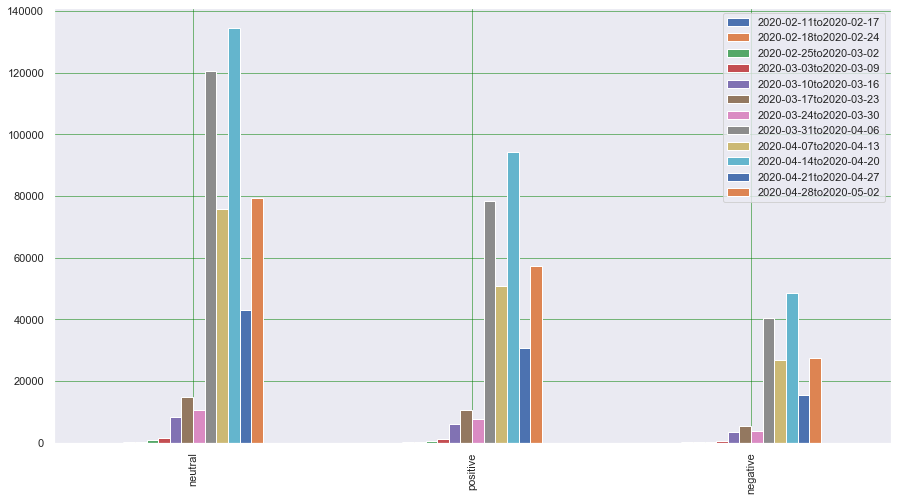

In [0]:
df4.plot(kind='bar',figsize=(15,8))
# Turn on the grid
#plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

# Topic Modelling

In [0]:
import pandas as pd
import operator
from sklearn.feature_extraction.text import TfidfVectorizer
df=pd.read_csv("Final.csv")
cv = TfidfVectorizer(max_features=1000)

In [0]:
co_di=df.groupby('Country')['cleaned_tweet'].apply(list).to_dict()
frame=pd.DataFrame.from_dict(co_di, orient='index').T

In [0]:
frame=frame[['Australia','Bangladesh','Indonesia','India','Italy','Japan','Philippines','Canada','United States','United Kingdom']]

In [0]:
def get_topics_country():
  topics=[]                     #Here we can get top topics from each country
  terms = cv.get_feature_names()
  for i, comp in enumerate(lsa_model.components_):
    st=''
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    for t in sorted_terms:
      st=st+str(" ")+t[0]
    topics.append(st)
  return topics

In [0]:
from sklearn.decomposition import TruncatedSVD
frames_countries=[]
for i in frame:
  X = cv.fit_transform(frame[i].dropna())   #Passing each country cleaned text
# SVD represent documents and terms in vectors 
  lsa_model = TruncatedSVD(n_components=15, algorithm='randomized', n_iter=100, random_state=122)
  lsa_topic_matrix =lsa_model.fit_transform(X)
  dfObj = pd.DataFrame(get_topics_country(), columns = [i]) #Forming a dataframe of top topics
  frames_countries.append(dfObj)
Country_analysis = pd.concat(frames_countries,axis=1)

We have choosed top countries manually and compared the top 15 topics discussed in tweets.

In [100]:
Country_analysis.index = ['Topic-1', 'Topic-2', 'Topic-3', 'Topic-4','Topic-5','Topic-6','Topic-7','Topic-8','Topic-9','Topic-10','Topic-11','Topic-12','Topic-13','Topic-14','Topic-15']
Country_analysis

,Australia,Bangladesh,Indonesia,India,Italy,Japan,Philippines,Canada,United States,United Kingdom
Topic-1,thi coronaviru ha case covid new peopl,test coronaviru thi posit covid ha case,covid positif corona cegah di lawan viru,covid coronaviru thi india case fight lockdown,coronaviru itali thi covid via lockdown new,japan coronaviru tokyo case theatr report death,case new thi total confirm philippin death,case thi new pandem death dure ha,thi test coronaviru ha death dure peopl,thi coronaviru covid peopl ha dure death
Topic-2,case new coronaviru death confirm australia t...,test posit player celtic smart marcu laker,indonesia coronaviru thi corona stay viru health,case coronaviru death posit new total test,coronaviru lockdown coronavirusitali coronavi...,theatr kabukiza tokyo today japan kabuki tradit,case total new confirm report death recoveri,case death new confirm total report ontario,case death test posit report counti new,coronaviru via sign petit ukchang test dure
Topic-3,australian app govern spread via download cov...,coronaviru case via updat death confirm new,corona dirumahaja viru lockdown stayathom cor...,coronaviru lockdown corona via indiafightscor...,itali covid milan quarantin lockdown iorestoa...,report commun mobil googl time test make,na sa covid ng ang mga case,via pandem dure updat youtub provid live,test posit thi get peopl covid wa,coronaviru death die test covid news case
Topic-4,via coronaviru dure youtub pandem sign petit,case confirm death counti new report first,coronaviru togeth dirumahaja spread slow dise...,via india app namo fight pm modi,covid via youtub di il la coronavirusitali,coronaviru report theatr mobil commun kabukiz...,test posit kit coronaviru patient neg diseas,via test posit youtub coronaviru canada updat,via test coronaviru posit dure youtub pandem,covid via test petit sign ukchang death
Topic-5,covid coronaviru test spread app corona coron...,covid case coronaviru confirm death corona co...,jakpost coronaviru test slow diseas ayobersam...,covid fight coronaviru india via corona app,via di youtub itali la per thi,updat stat april gmt last world franc,covid thi test posit stay time peopl,via youtub death dure covid thi case,via covid youtub coronaviru die trump peopl,covid coronaviru dure pandem support lockdown...
Topic-6,covid via case youtub sign petit changeau,via covid case sign youtub petit chang,stay home stayathom indonesia fight surabaya ...,test posit via hospit kit coronaviru app,via case new itali death youtub di,japan time last stat gmt emerg franc,covid coronaviru philippin updat citi quarant...,test dure posit pandem new worker care,coronaviru updat diseas covid thi pandem news,death uk dure covid new pandem case
Topic-7,test posit via peopl get die youtub,viru call chine china via corona trump,positif lockdown di oh youtub mah sing,lockdown via covid dure app namo due,di il la per del che al,test difficult rate ass preval accur broadli,coronaviru thi updat diseas na peopl stayhome...,canada news cbc say canadian ha death,covid dure pandem die peopl death health,thi via coronaviru youtub lockdown sign petit
Topic-8,thi via coronaviru death youtub wa like,stay peopl home bangladesh get test viru,day world indonesia youtub health danc staysaf,lockdown stay fight home india test safe,thank extraordinari emerg support brand itali...,tokyo case confirm new total number outbreak,citi quarantin patient philippin stay day home,coronaviru pandem covid dure test death latest,thi covid dure case test via posit,peopl die home care nh worker help
Topic-9,thi test new dure posit case coronaviru,updat stay viru home corona safe ha,test rapid posit via stay coronaviru viru,india lockdown test news ha time countri,news test see itali posit stori top,youtub tokyo via admonit nevergiveup japanes ...,patient coronaviru recov hospit die diseas co...,new news coronaviru cbc covid report say,dure pandem die death peopl thi test,peopl dure lockdown die pandem test crisi
Topic-10,ha australia

In [0]:
X = cv.fit_transform(df['cleaned_tweet'])   #Here we have fitted cleaned tweets of whole dataset
# SVD represent documents and terms in vectors       #It gives top topics from whole dataset
lsa_model = TruncatedSVD(n_components=15, algorithm='randomized', n_iter=100, random_state=122)
lsa_topic_matrix =lsa_model.fit_transform(X)
dfObj = pd.DataFrame(get_topics_country(), columns = ['All countries'])

Now we will see top Topics from whole countries in dataset.

In [102]:
dfObj.index = ['Topic-1', 'Topic-2', 'Topic-3', 'Topic-4','Topic-5','Topic-6','Topic-7','Topic-8','Topic-9','Topic-10','Topic-11','Topic-12','Topic-13','Topic-14','Topic-15']
dfObj

,All countries
Topic-1,thi coronaviru case covid test ha peopl
Topic-2,case death new coronaviru test confirm report
Topic-3,coronaviru via dure pandem youtub updat crisi
Topic-4,test posit coronaviru covid via get antibodi
Topic-5,coronaviru covid thi die corona viru lockdown
Topic-6,covid via youtub death petit sign case
Topic-7,covid dure pandem test help support new
Topic-8,thi case test dure posit new covid
Topic-9,dure death pandem peopl die test toll
Topic-10,ha pandem death trump respons updat wa


# LSA Topic Visualization

In [0]:
from collections import Counter
from matplotlib import pyplot as plt
def vizualize():
  keys = lsa_topic_matrix.argmax(axis=1).tolist()     #To visualize the topics 
  count_pairs = sorted(Counter(keys).items())
  lsa_categories = [pair[0] for pair in count_pairs]
  lsa_counts = [pair[1] for pair in count_pairs]
  terms = cv.get_feature_names()
  x_lable=[]
  for i, comp in enumerate(lsa_model.components_):
    words=[]
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:3]
    for t in sorted_terms:
        words.append(t[0])
    x_lable.append("Topic :"+ str(i)+" "+" ".join(words))
  fig, ax = plt.subplots(figsize=(15,5),)
  plt.xticks(rotation=90)
  ax.bar(x_lable, lsa_counts);
  ax.set_xticks(lsa_categories);
  ax.set_ylabel('Document Frequency');
  ax.set_title('LSA topic counts');
  plt.show()


Country: Australia


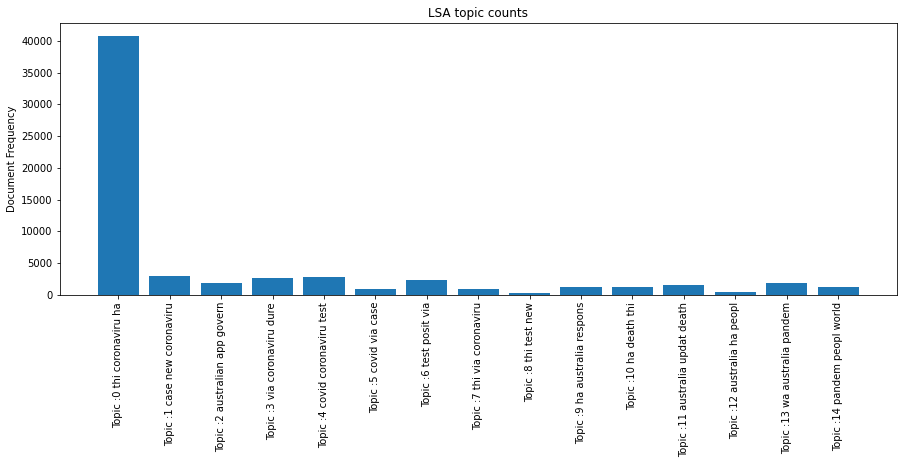

Country: Bangladesh


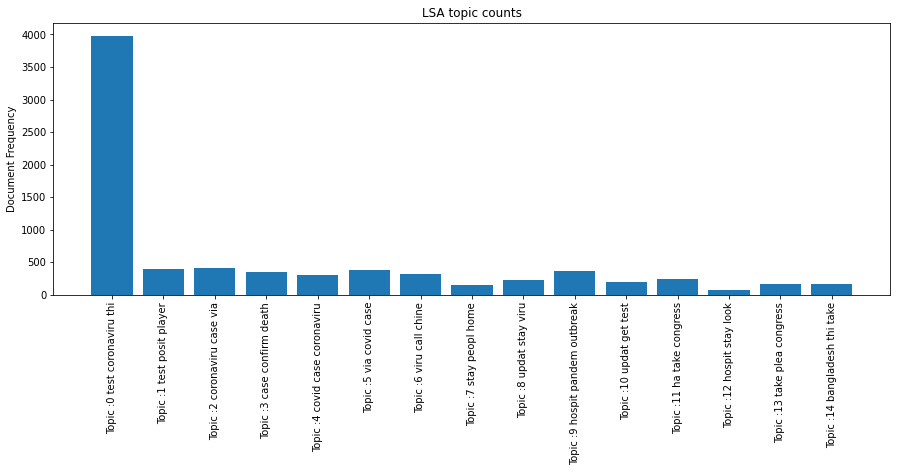

Country: Indonesia


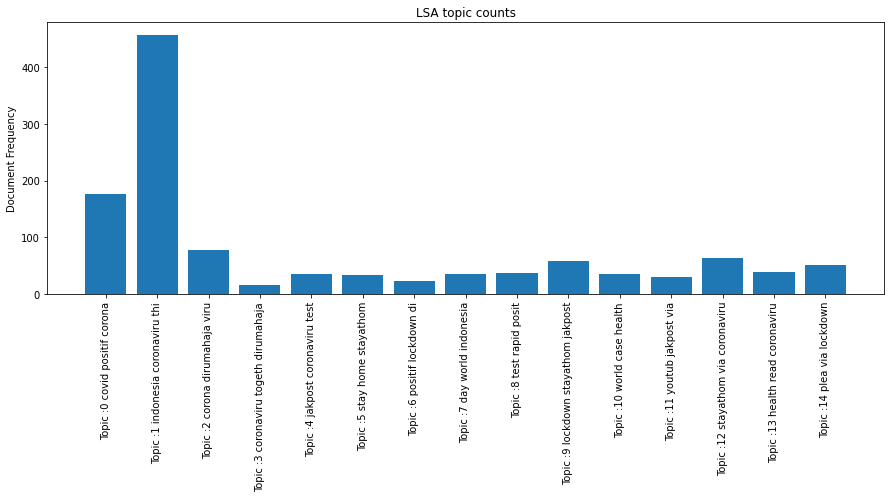

Country: India


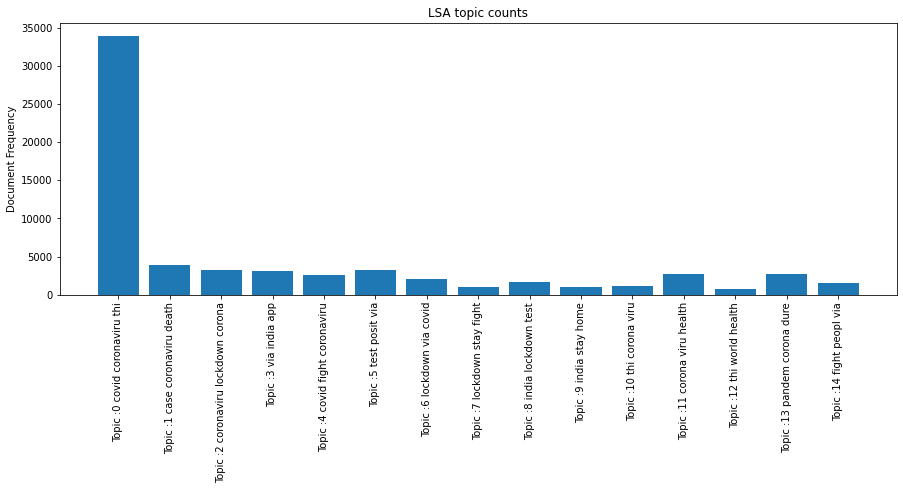

Country: Italy


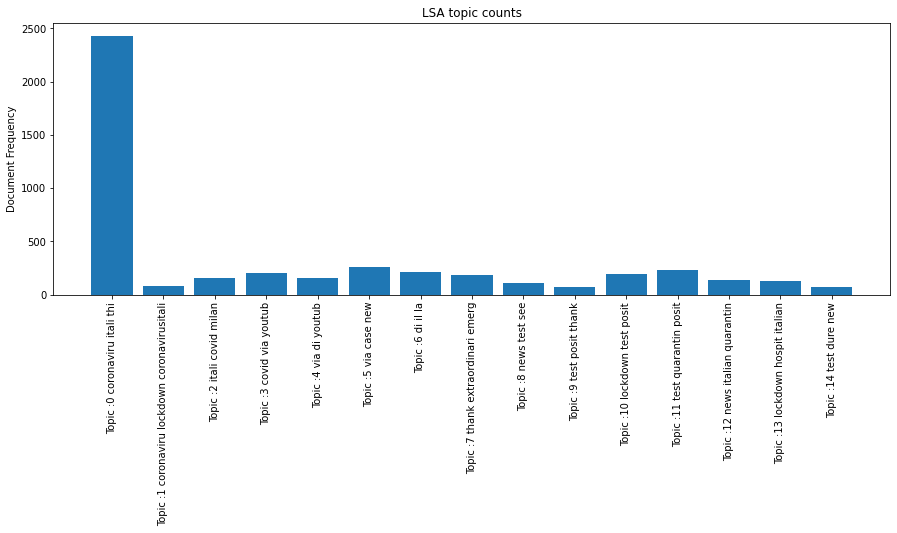

Country: Japan


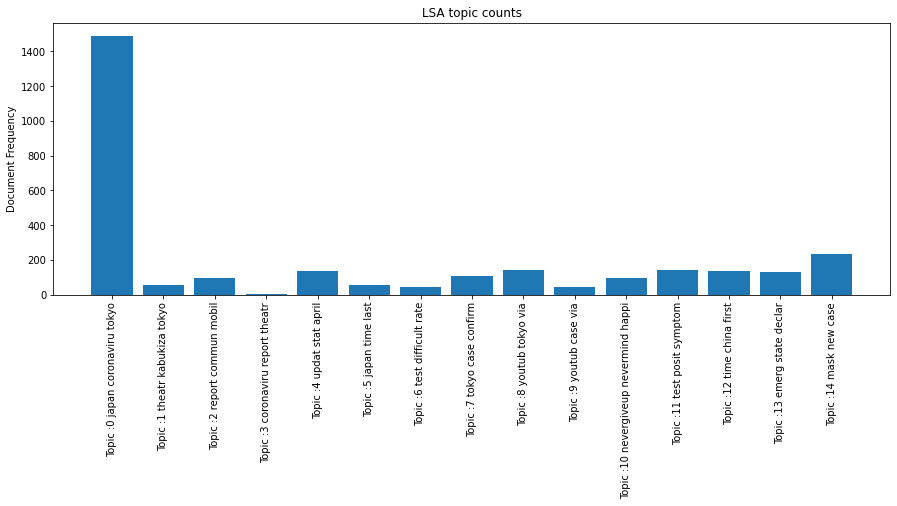

Country: Philippines


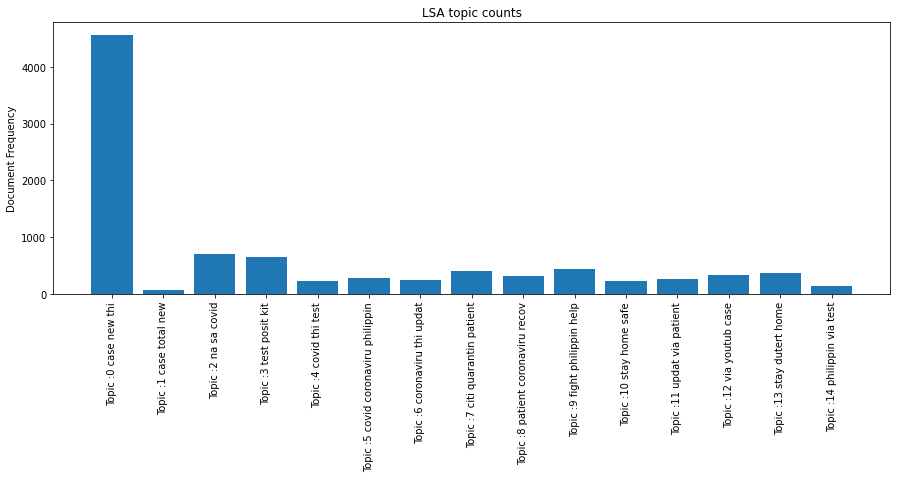

Country: Canada


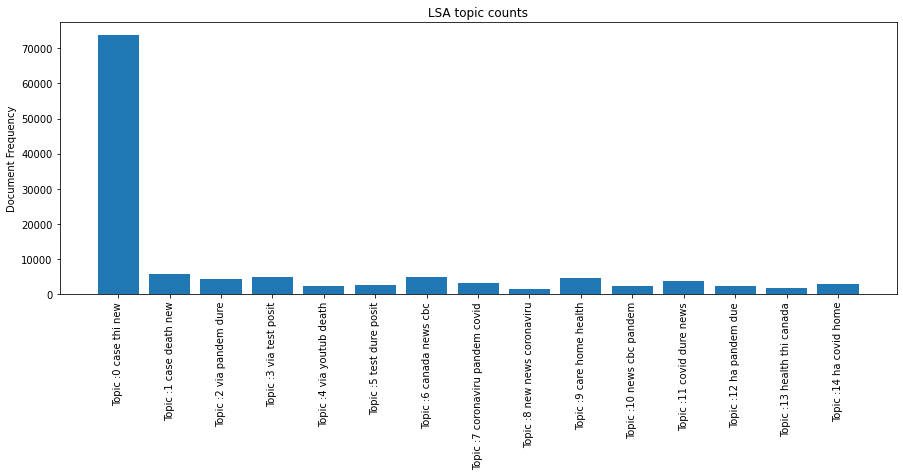

Country: United States


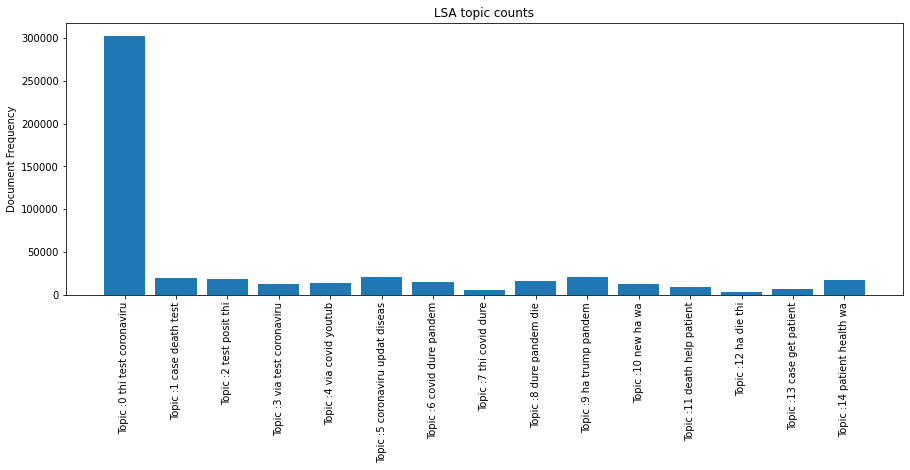

Country: United Kingdom


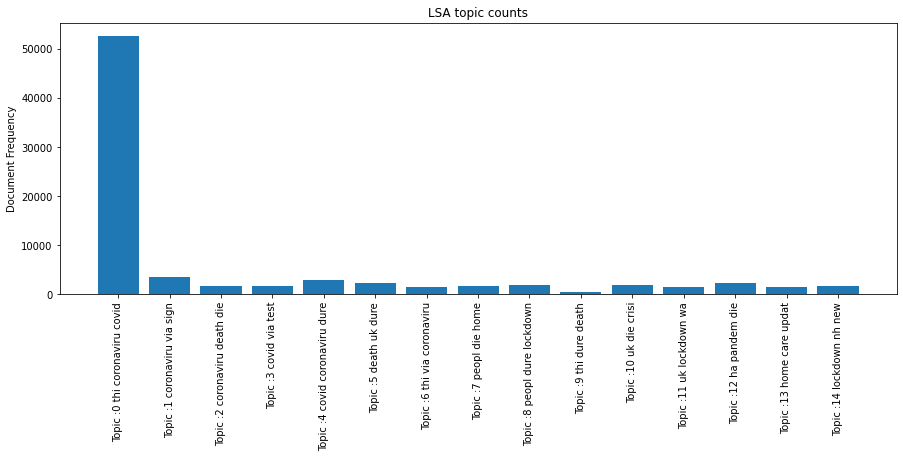

In [106]:
for i in frame:
  try:              #Calling visualize module for each country
    X = cv.fit_transform(frame[i].dropna())
    print('Country:',i)
# SVD represent documents and terms in vectors 
    lsa_model = TruncatedSVD(n_components=15, algorithm='randomized', n_iter=100, random_state=122)
    lsa_topic_matrix =lsa_model.fit_transform(X)
    vizualize()
  except:
    continue

All countries


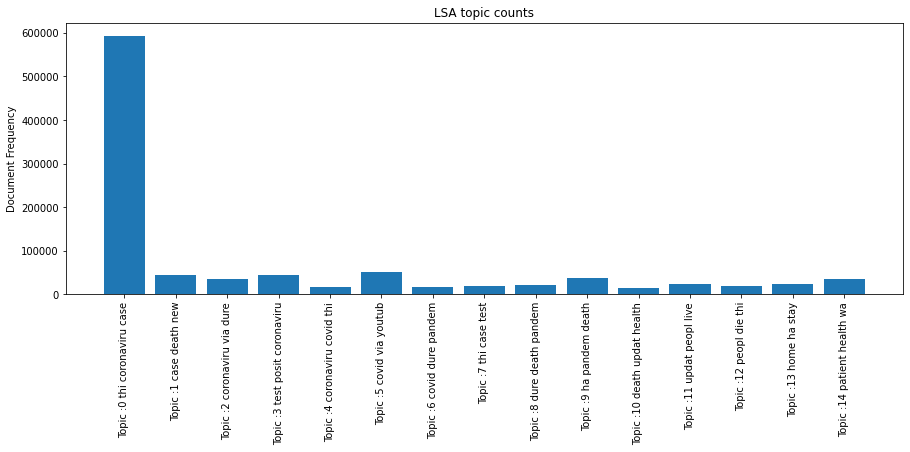

In [107]:
X = cv.fit_transform(df['cleaned_tweet'])
print('All countries')    #We will call visualize module for whole dataset.
# SVD represent documents and terms in vectors 
lsa_model = TruncatedSVD(n_components=15, algorithm='randomized', n_iter=100, random_state=122)
lsa_topic_matrix =lsa_model.fit_transform(X)
vizualize()